In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [3]:
data=pd.read_csv('/content/drive/My Drive/PDS_code/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data['Percentage'] = round((data['math score'] + data['reading score'] + data['writing score']) / 3,2)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


# Data Preprocessing

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Percentage                     0
dtype: int64

In [6]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
Percentage                     float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Percentage                   1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [8]:
data.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


<Axes: >

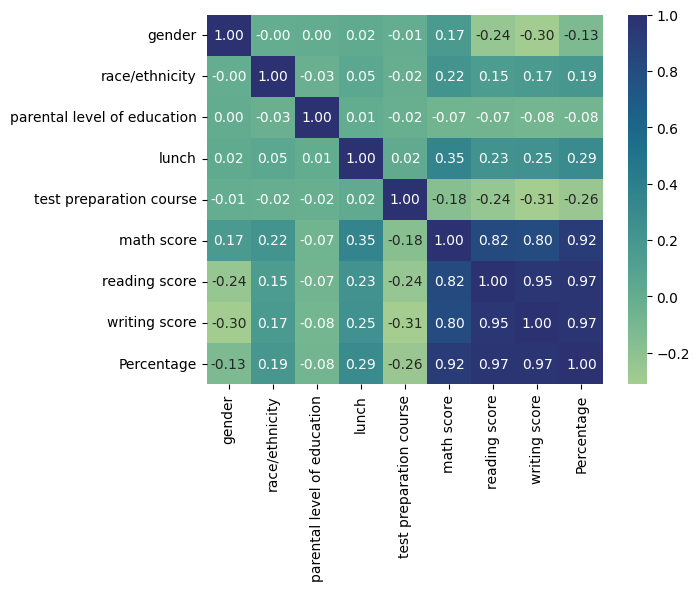

In [9]:
from sklearn.preprocessing import LabelEncoder

df = data.copy()

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

sns.heatmap(df.corr(), cmap = "crest" ,fmt = '.2f' ,annot=True)


- There is no correlation between independent attributes or independent and dependent attributes.
- There is a moderate to high positive correlation between all the test scores.

# Visualization

### Number of students in each Group and Percentage

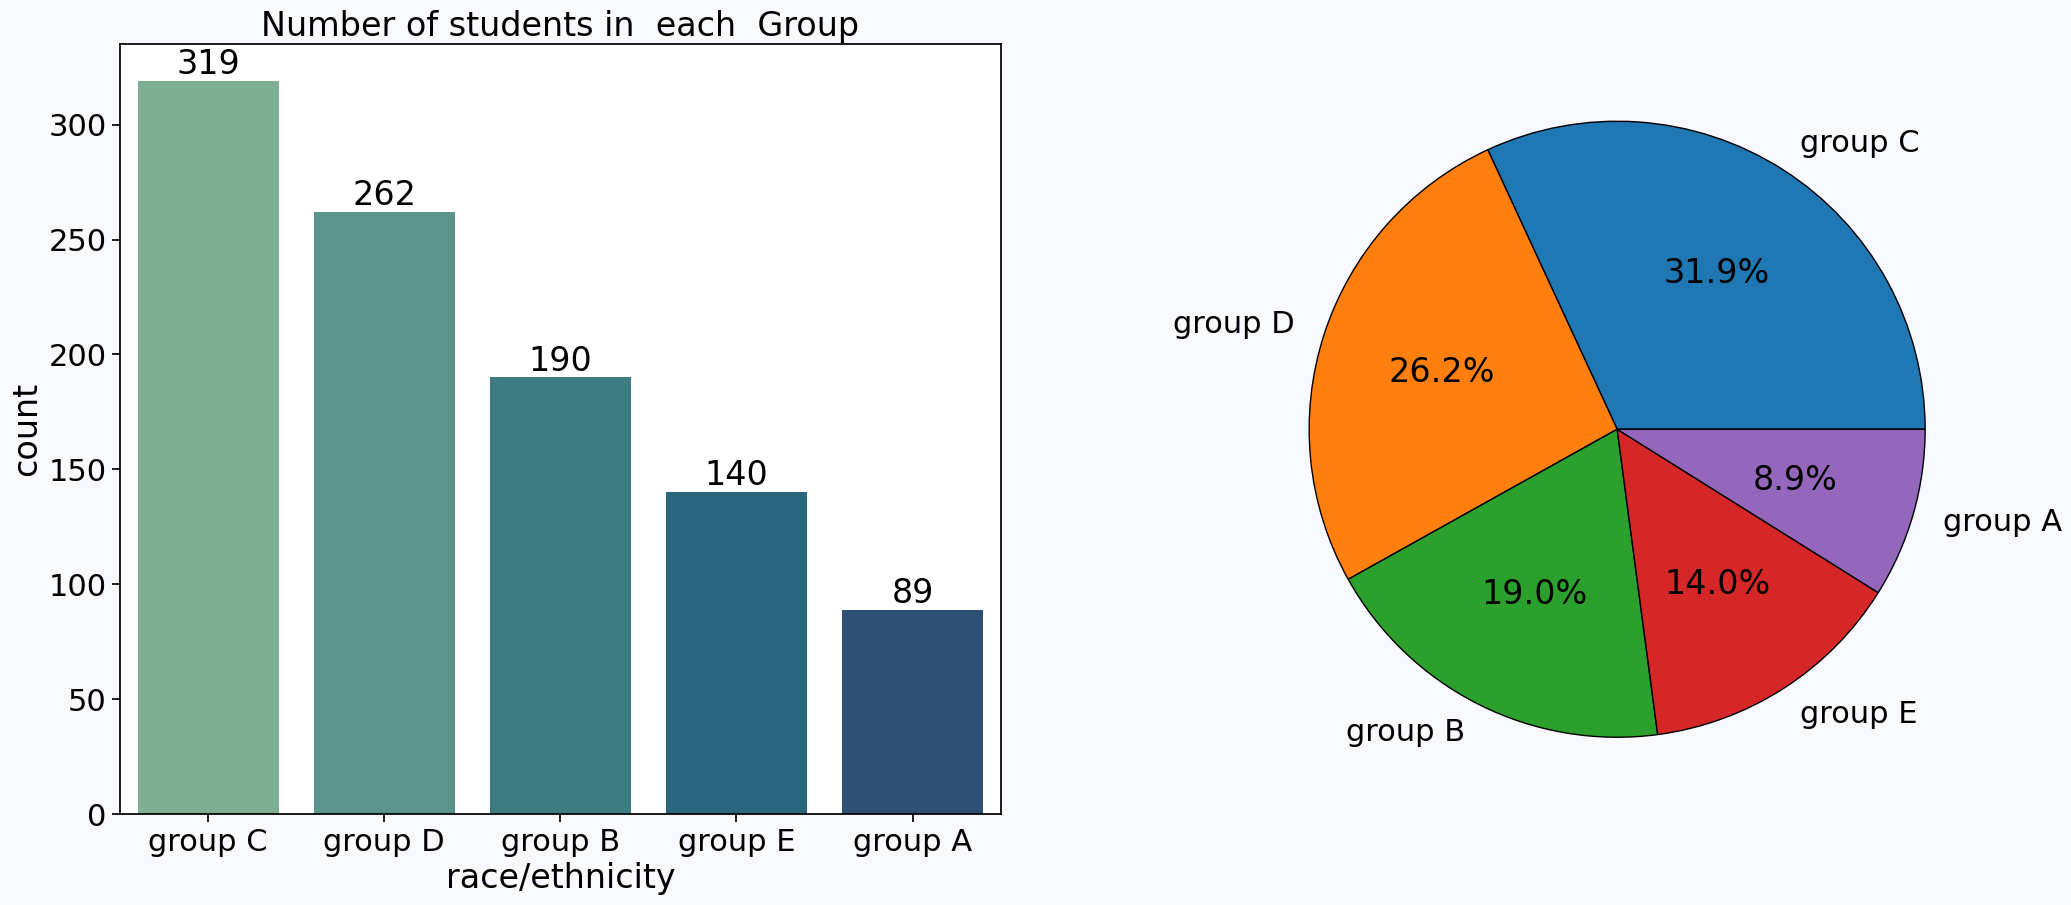

In [10]:
sns.set_context('notebook',font_scale= 2)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'race/ethnicity',data = data ,order = data['race/ethnicity'].value_counts().index ,palette="crest", ax = axs[0])
axs[0].set_title('Number of students in  each  Group')
g.bar_label(g.containers[0])
plt.pie(data['race/ethnicity'].value_counts().values , labels =data['race/ethnicity'].value_counts().index 
        , shadow = False , autopct= '%1.1f%%', wedgeprops= {'edgecolor' : 'black'} )
plt.grid()
plt.show()

Group C has highest number of students

### Number of Male/Female in school and Percentage

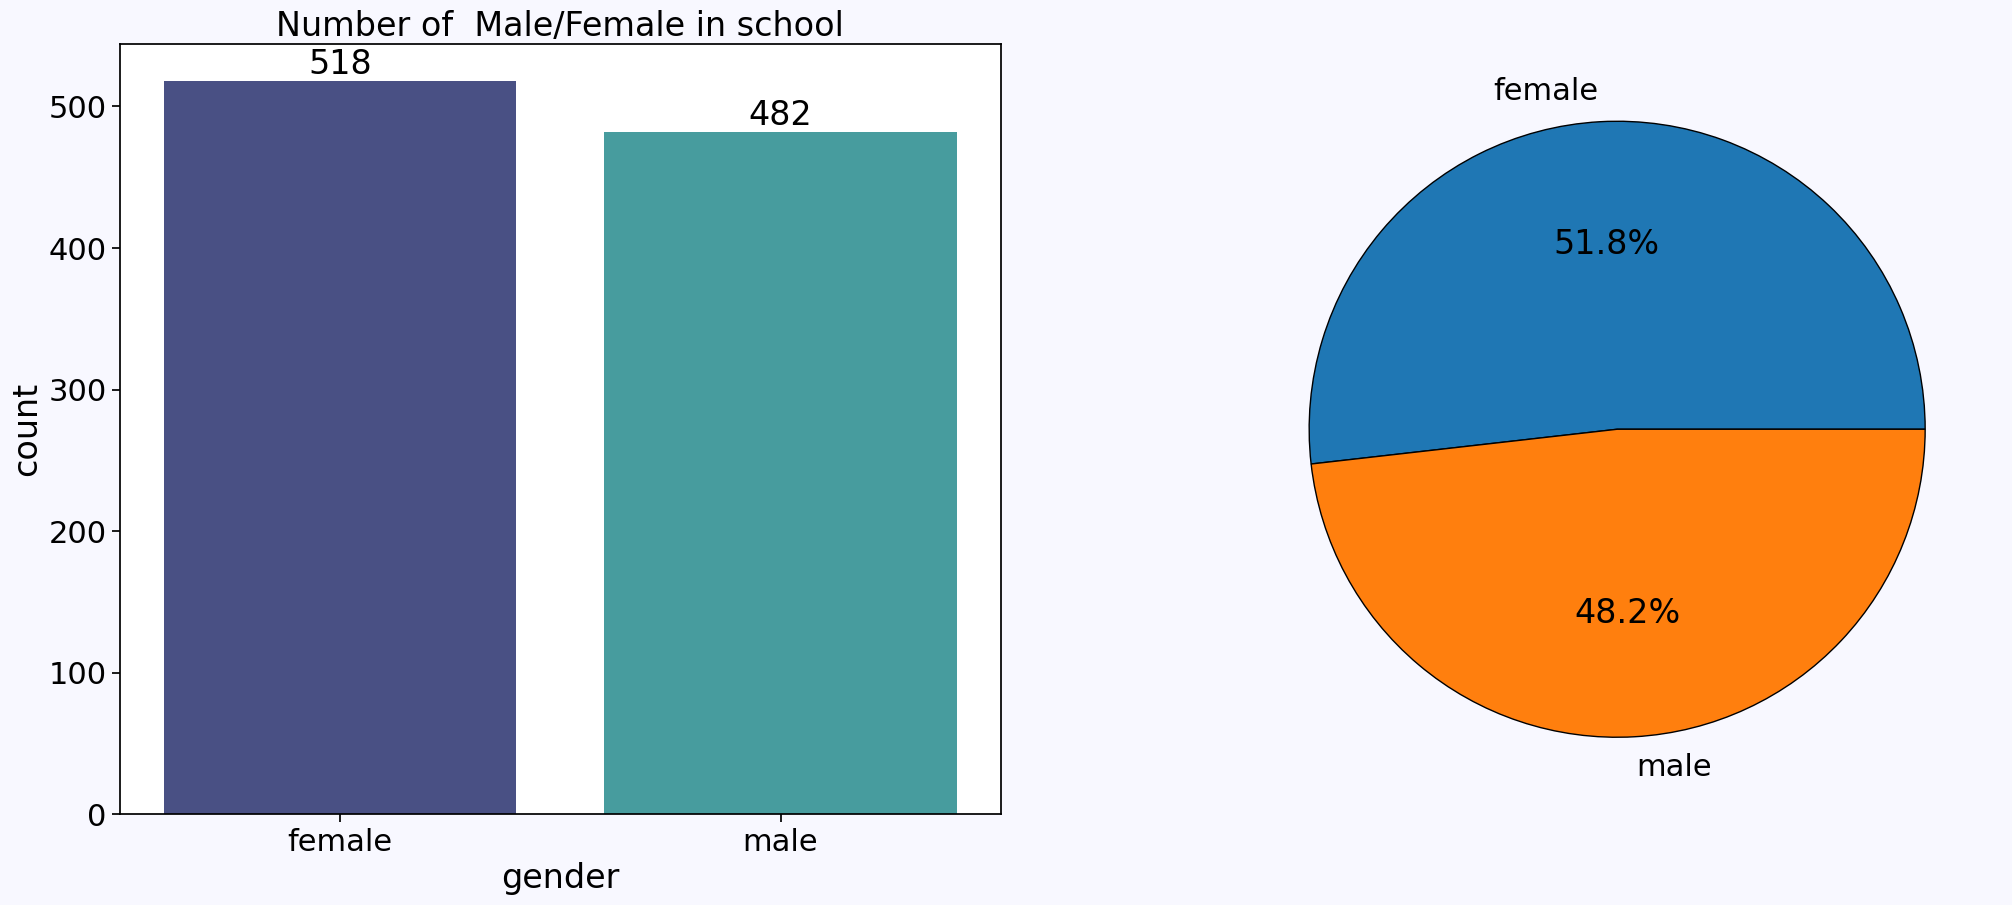

In [11]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'gender',data = data ,order = data['gender'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Number of  Male/Female in school')
g.bar_label(g.containers[0])
plt.pie(data['gender'].value_counts().values , labels =data['gender'].value_counts().index 
        , shadow = False , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

Number of males and females are almost equally dstributed

### Count of parental level of education and Percentage

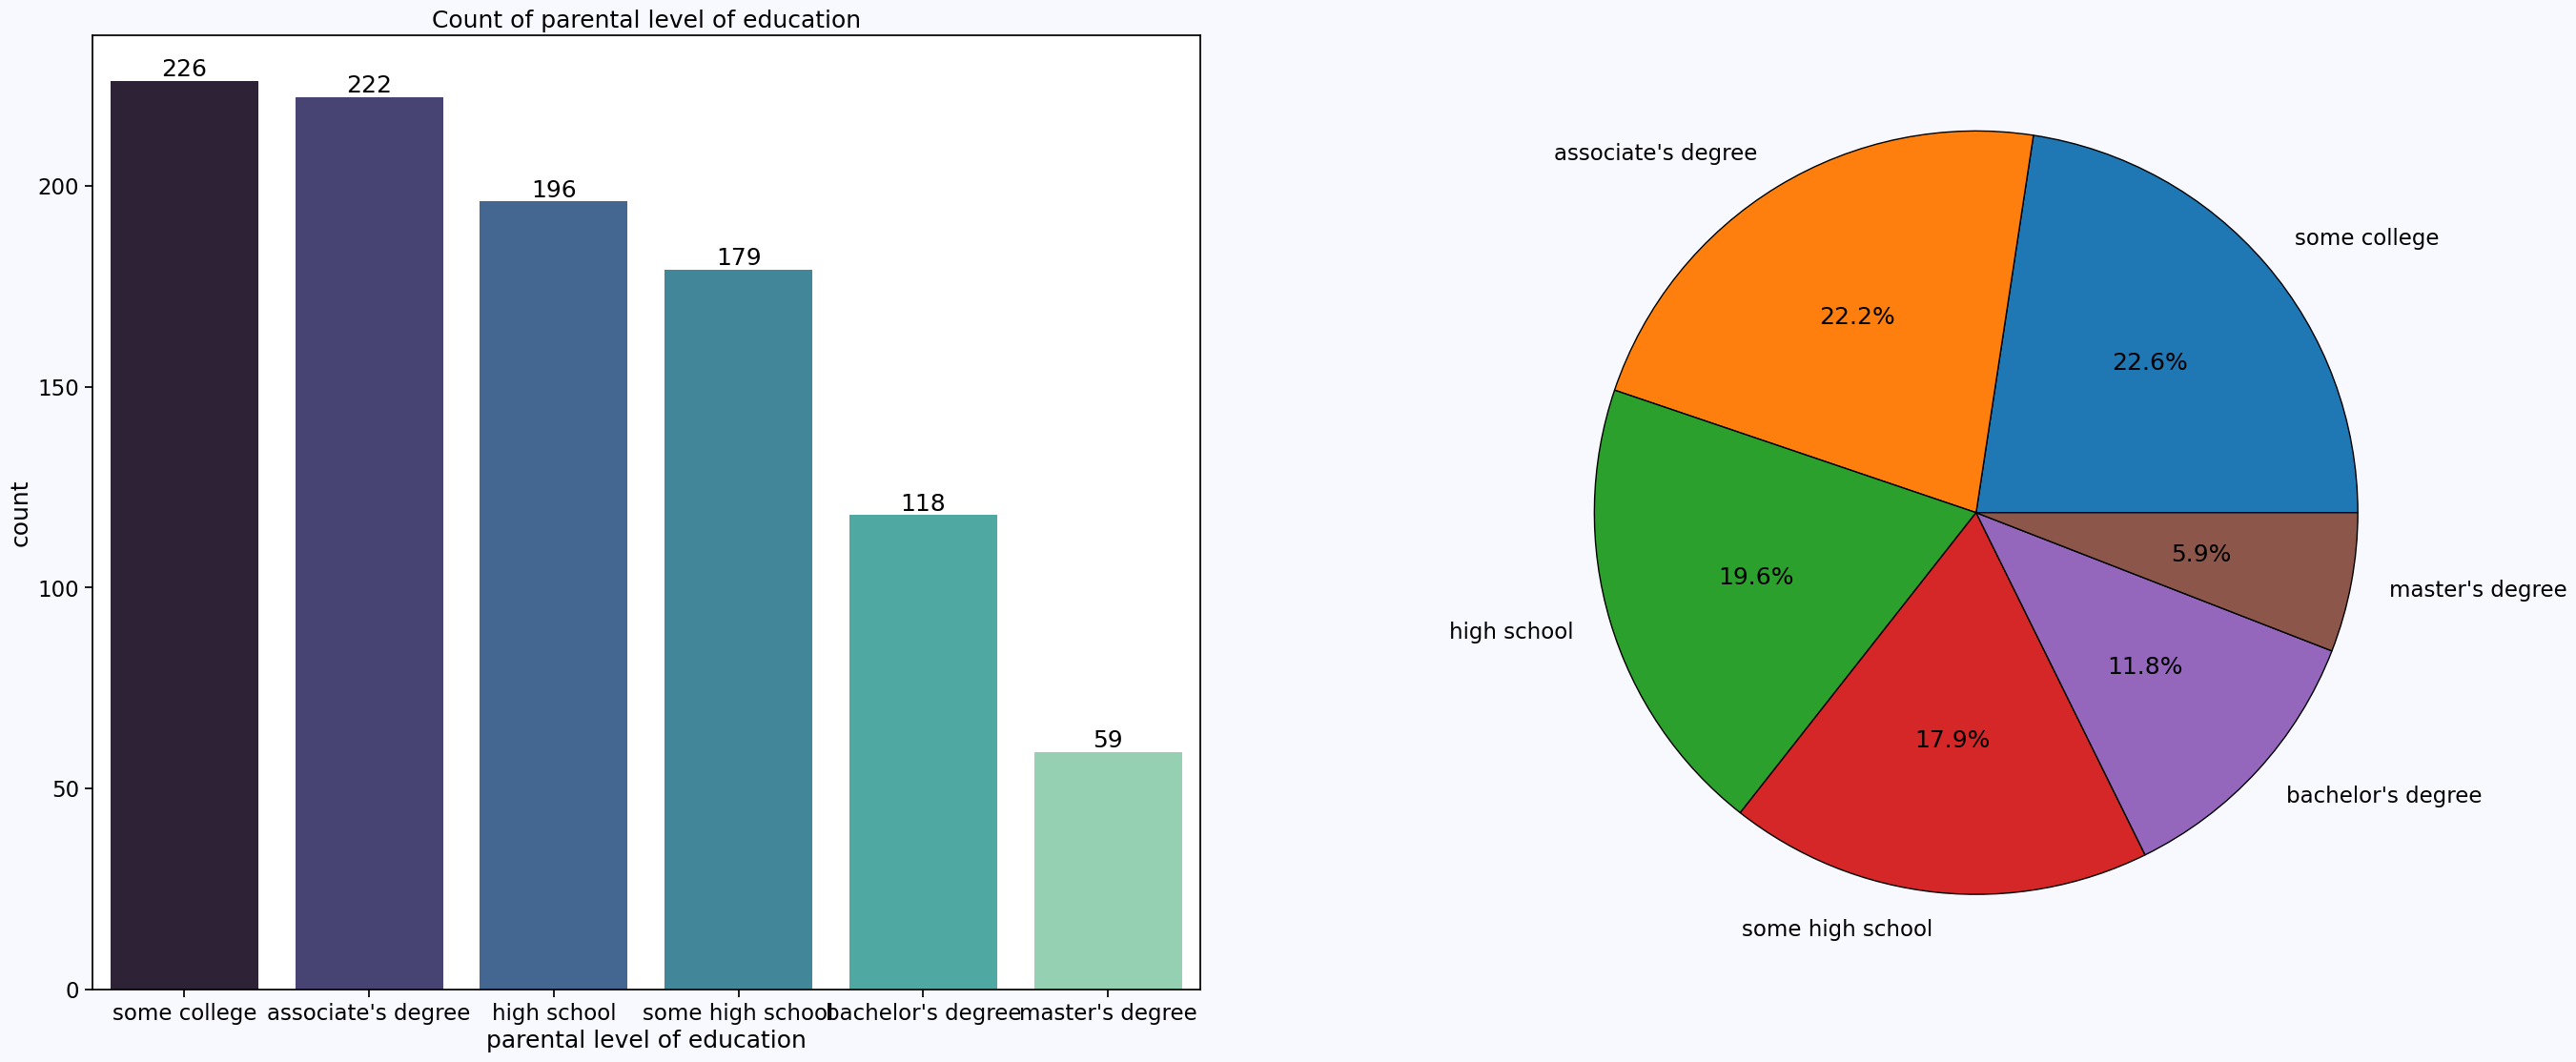

In [12]:
sns.set_context('notebook',font_scale= 1.5)
fig, axs = plt.subplots(1,2,figsize = (33,13))

g = sns.countplot(x = 'parental level of education',data = data ,order = data['parental level of education'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Count of parental level of education')
g.bar_label(g.containers[0])
plt.pie(data['parental level of education'].value_counts().values , labels =data['parental level of education'].value_counts().index 
        , shadow = False , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

Most of the parents education is some college and associate degree is second highest with not much difference

### Number of Students who take Standard (free/reduced)

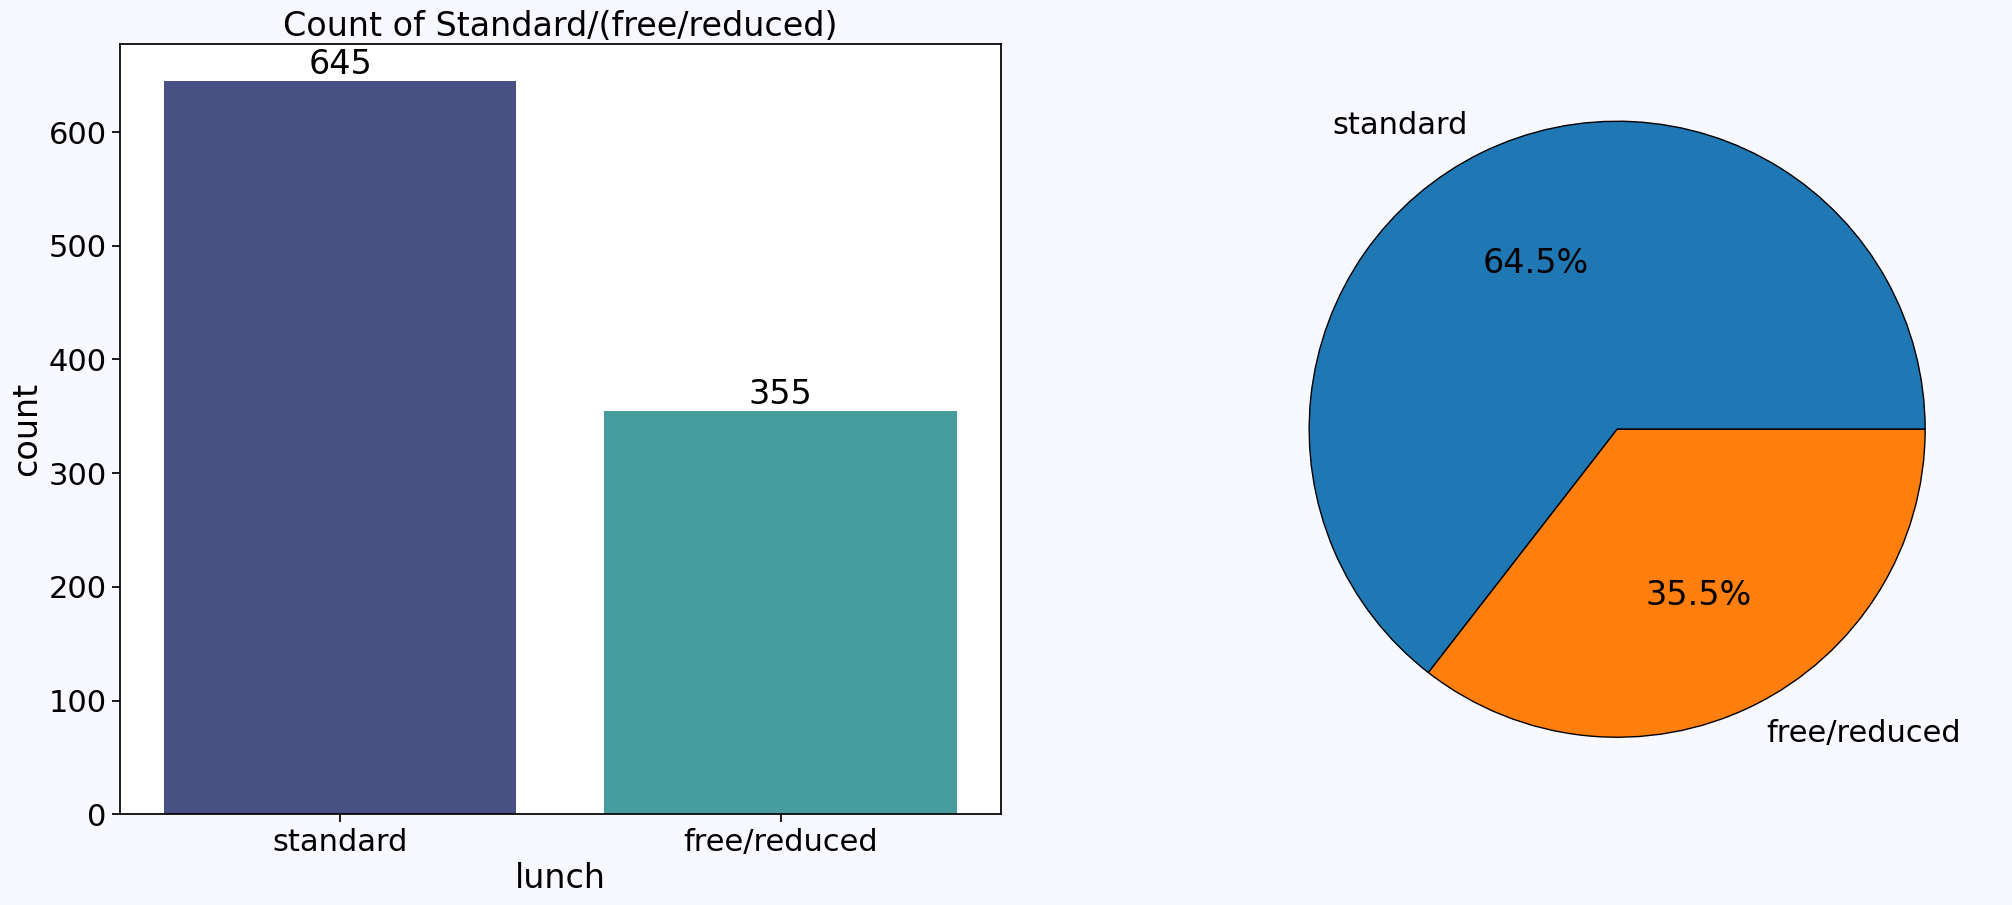

In [13]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'lunch',data = data ,order = data['lunch'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Count of Standard/(free/reduced)')
g.bar_label(g.containers[0])
plt.pie(data['lunch'].value_counts().values , labels =data['lunch'].value_counts().index 
        , shadow = False , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

for most of the students, lunch fee is standard

### Number of of Studnts who take Preparation Course

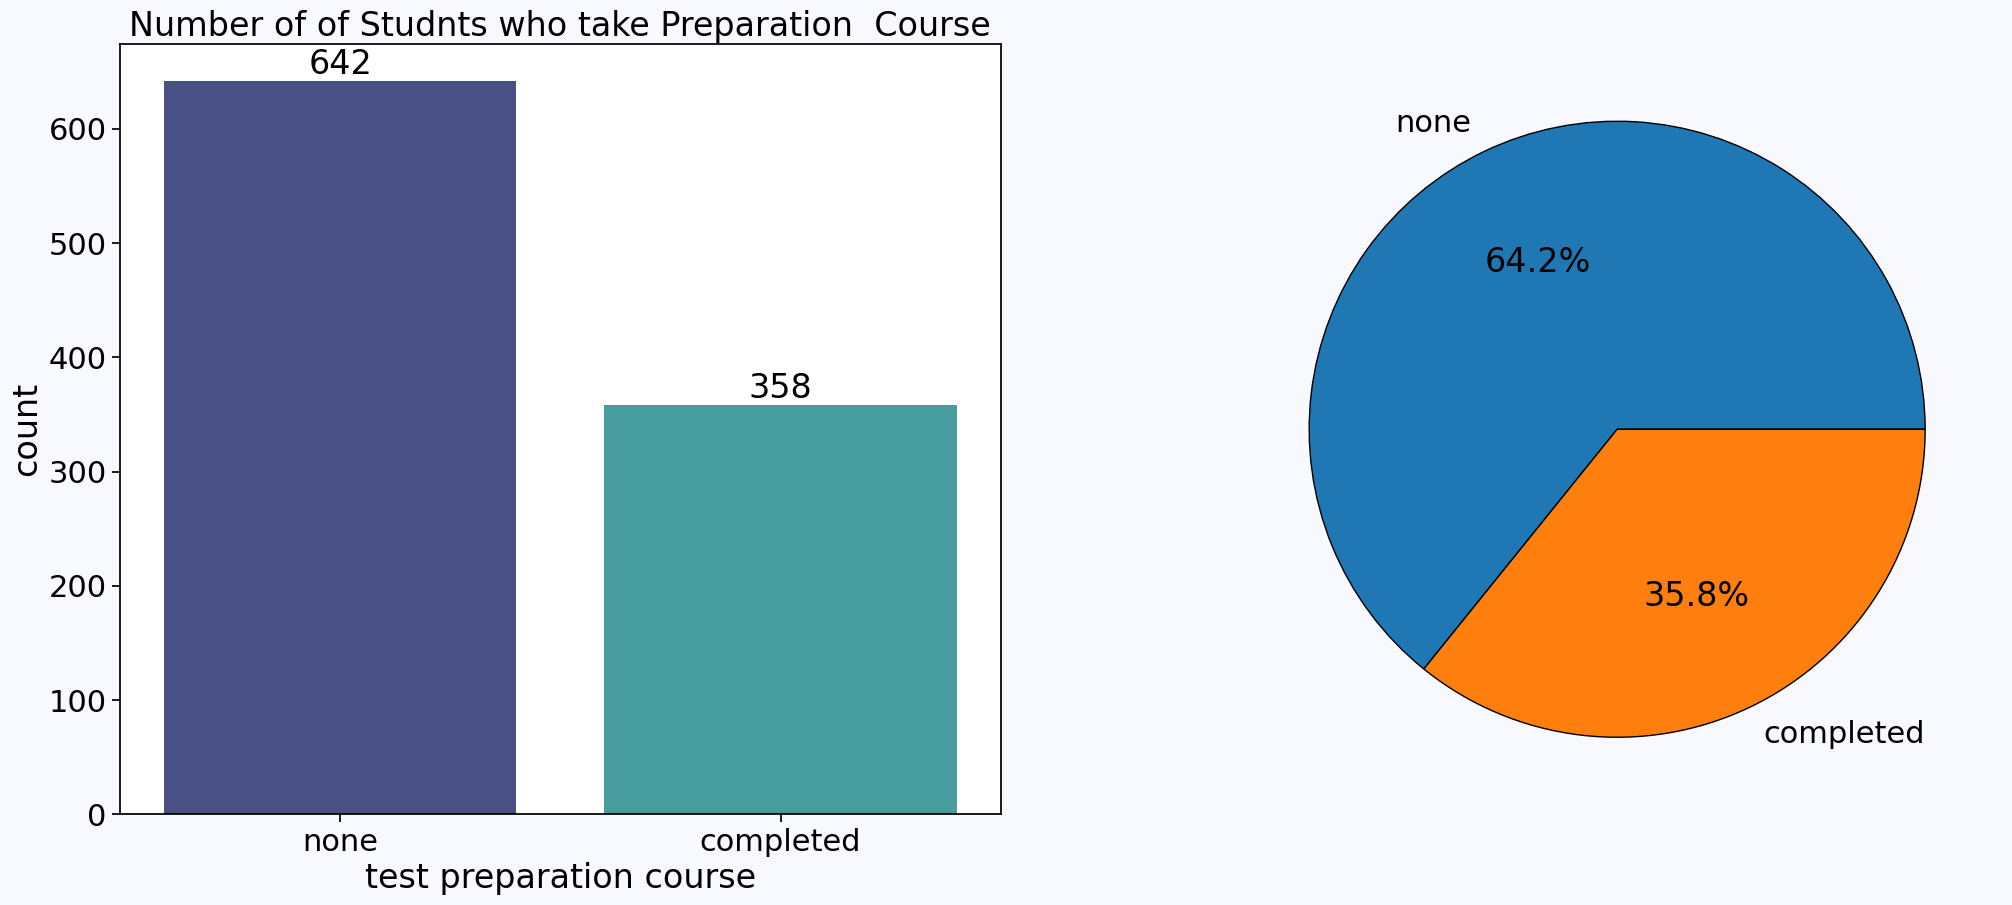

In [14]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'test preparation course',data = data ,order = data['test preparation course'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Number of of Studnts who take Preparation  Course')
g.bar_label(g.containers[0])
plt.pie(data['test preparation course'].value_counts().values , labels =data['test preparation course'].value_counts().index 
        , shadow = False , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

Most of the students haven't taken any test preparation course

### Density Percentages

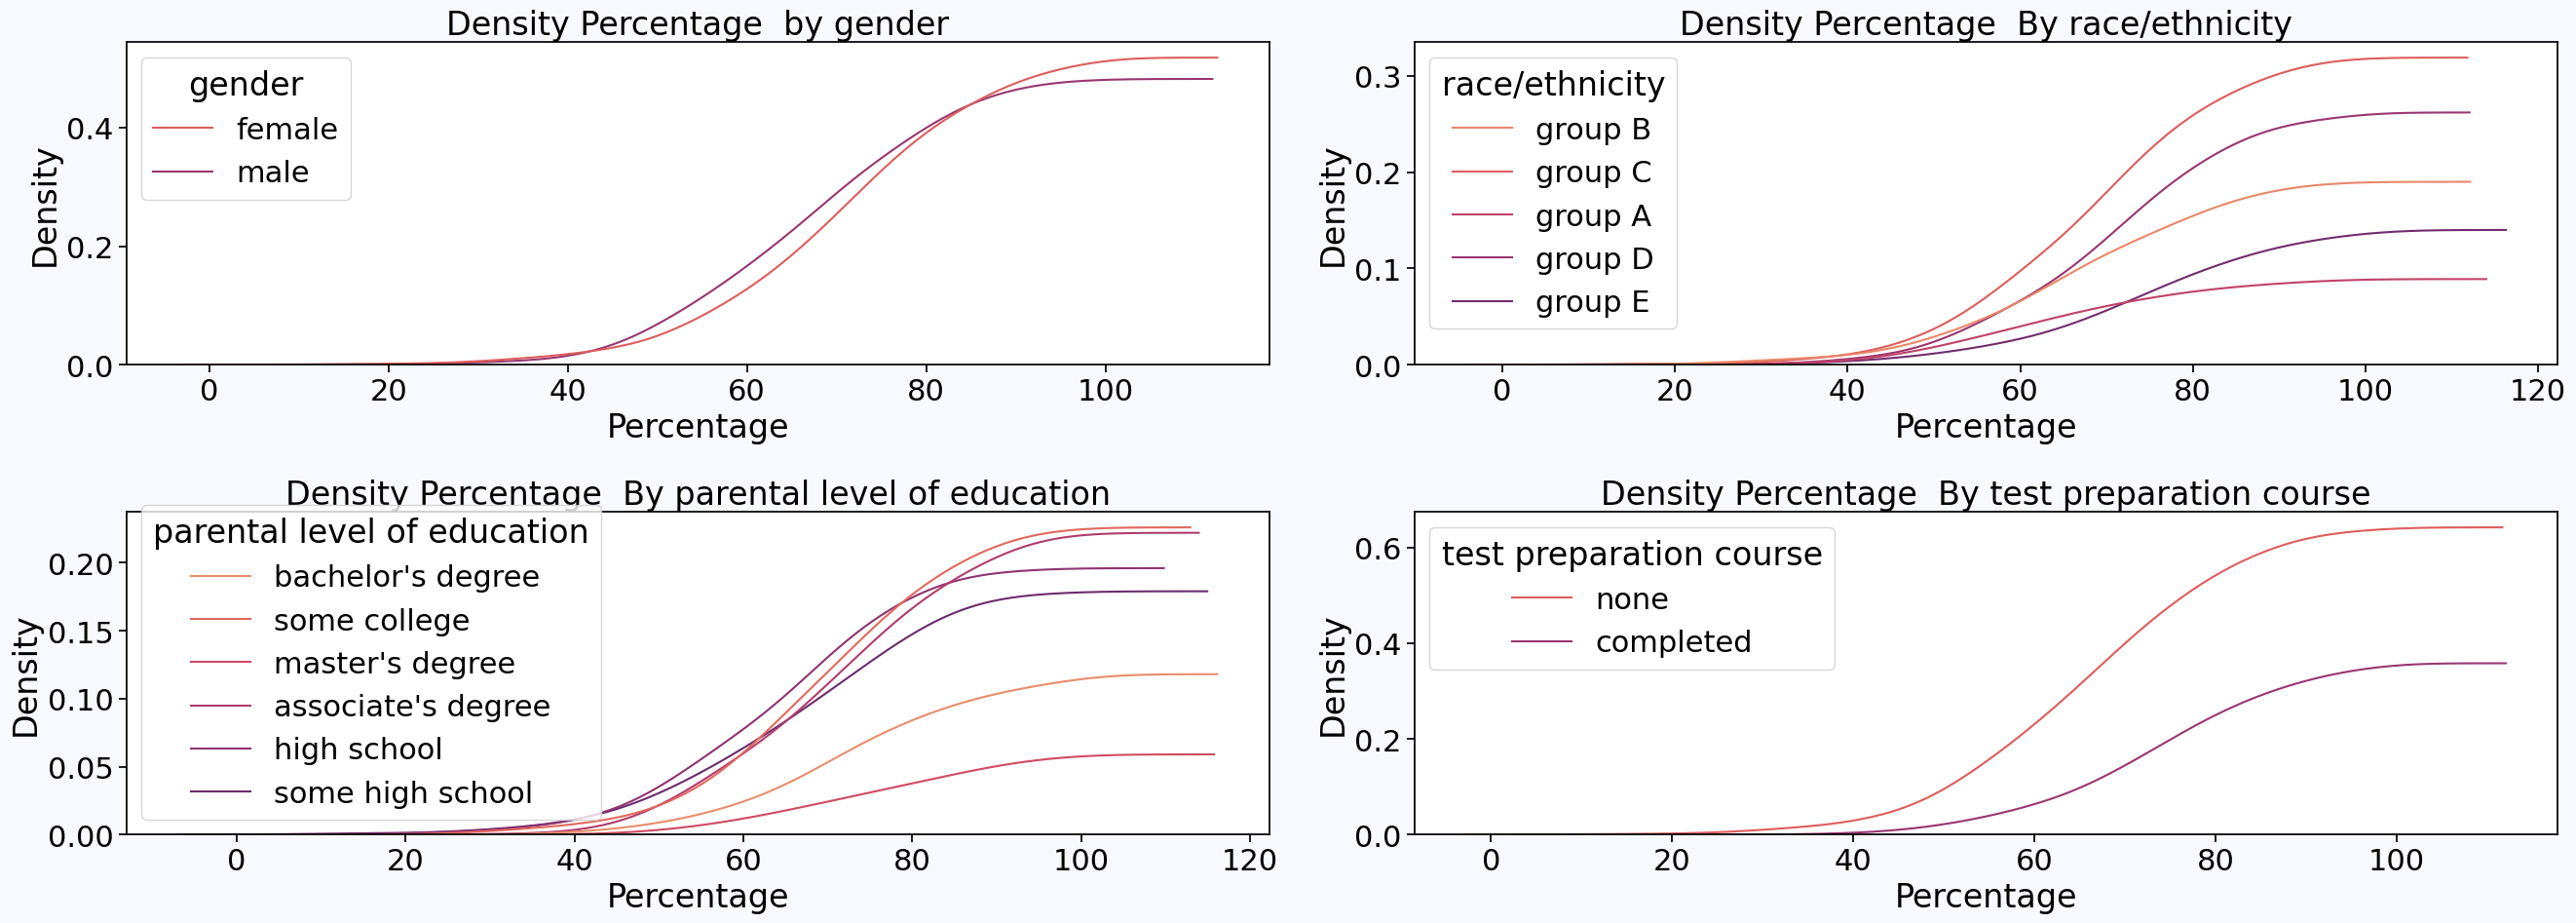

In [15]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(2,2,figsize = (27,10))
sns.kdeplot(hue = 'gender',x = 'Percentage',data = data ,cumulative=True   , palette= 'flare' ,ax = axs[0][0])
axs[0][0].set_title('Density Percentage  by gender')

sns.kdeplot(hue= 'race/ethnicity',x = 'Percentage',data = data ,cumulative=True  , palette= 'flare' ,ax = axs[0][1])
axs[0][1].set_title('Density Percentage  By race/ethnicity')

sns.kdeplot(hue = 'parental level of education',x = 'Percentage',data = data  ,cumulative=True  , palette= 'flare' ,ax = axs[1][0])
axs[1][0].set_title('Density Percentage  By parental level of education')

sns.kdeplot(hue = 'test preparation course',x = 'Percentage',data = data ,cumulative=True   , palette= 'flare' ,ax = axs[1][1])
axs[1][1].set_title('Density Percentage  By test preparation course')
plt.tight_layout()
plt.show()

This density-Percentage plot gives the probability distribution of percentage with various classes.

<ipython-input-16-60d869b4d5d5>:4: FutureWarning: The operation <function mean at 0x7f0c200ed360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  data.groupby('gender').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[0]).legend(prop={'size': 10},loc = "center right")
<ipython-input-16-60d869b4d5d5>:5: FutureWarning: The operation <function mean at 0x7f0c200ed360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  data.groupby('race/ethnicity').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[1]).legend(prop={'size': 10})


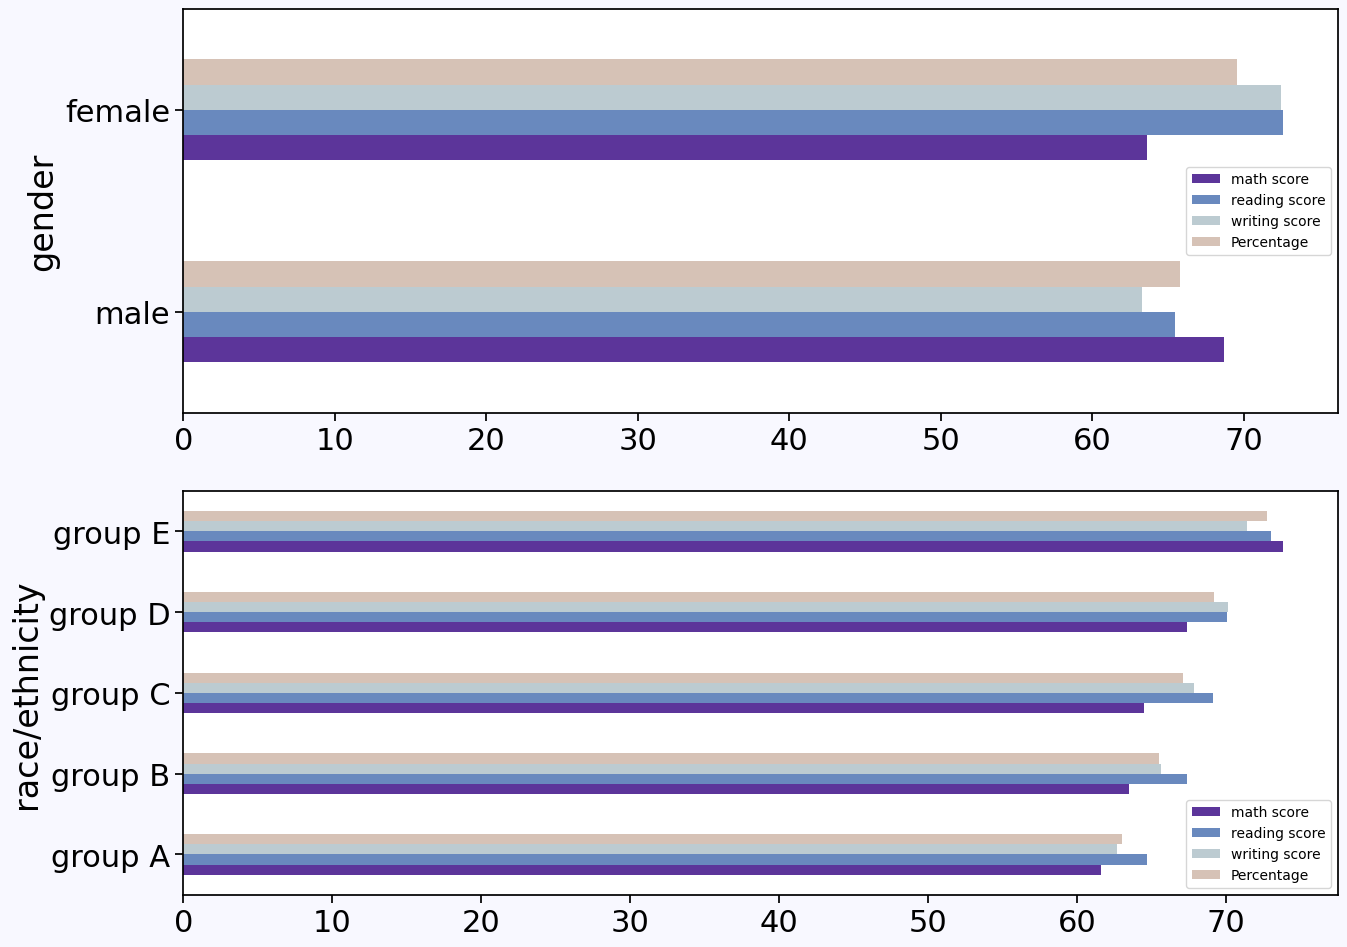

In [16]:
fig, axs = plt.subplots(2,1,figsize = (14,10))

sns.set_palette("twilight_shifted")
data.groupby('gender').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[0]).legend(prop={'size': 10},loc = "center right")
data.groupby('race/ethnicity').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[1]).legend(prop={'size': 10})
plt.tight_layout()
plt.show()

- These are the bar plots of the score vs gender and score vs race/ethnicity.
- Females have achieved highest in both reading and writing score but Males get the highest in Math score.
- Group E got the highest score in all 3 scores among the groups.


<ipython-input-17-4a5099b95e10>:4: FutureWarning: The operation <function mean at 0x7f0c200ed360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  data.groupby('parental level of education').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[0]).legend(prop={'size': 10})
<ipython-input-17-4a5099b95e10>:5: FutureWarning: The operation <function mean at 0x7f0c200ed360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  data.groupby('lunch').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[1]).legend(prop={'size': 10},loc = 'center right')


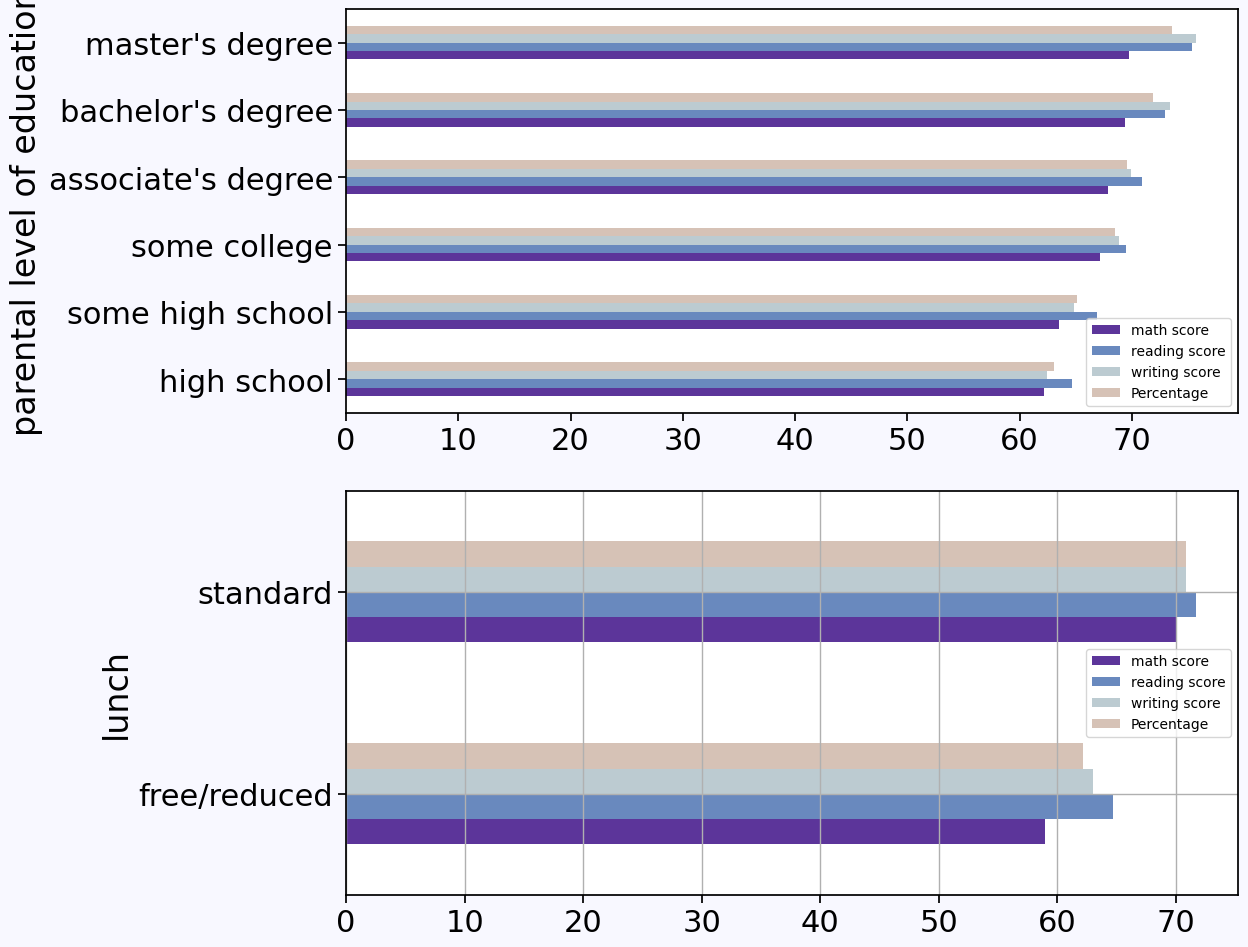

In [17]:
fig, axs = plt.subplots(2,1,figsize = (13,10))

sns.set_palette("twilight_shifted")
data.groupby('parental level of education').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[0]).legend(prop={'size': 10})
data.groupby('lunch').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[1]).legend(prop={'size': 10},loc = 'center right')
plt.grid()
plt.tight_layout()
plt.show()

- Parental having of Master’s degree students got the highest score than others
- Students taking Standard lunch got the highest score than free lunch.


<Axes: xlabel='Percentage', ylabel='Count'>

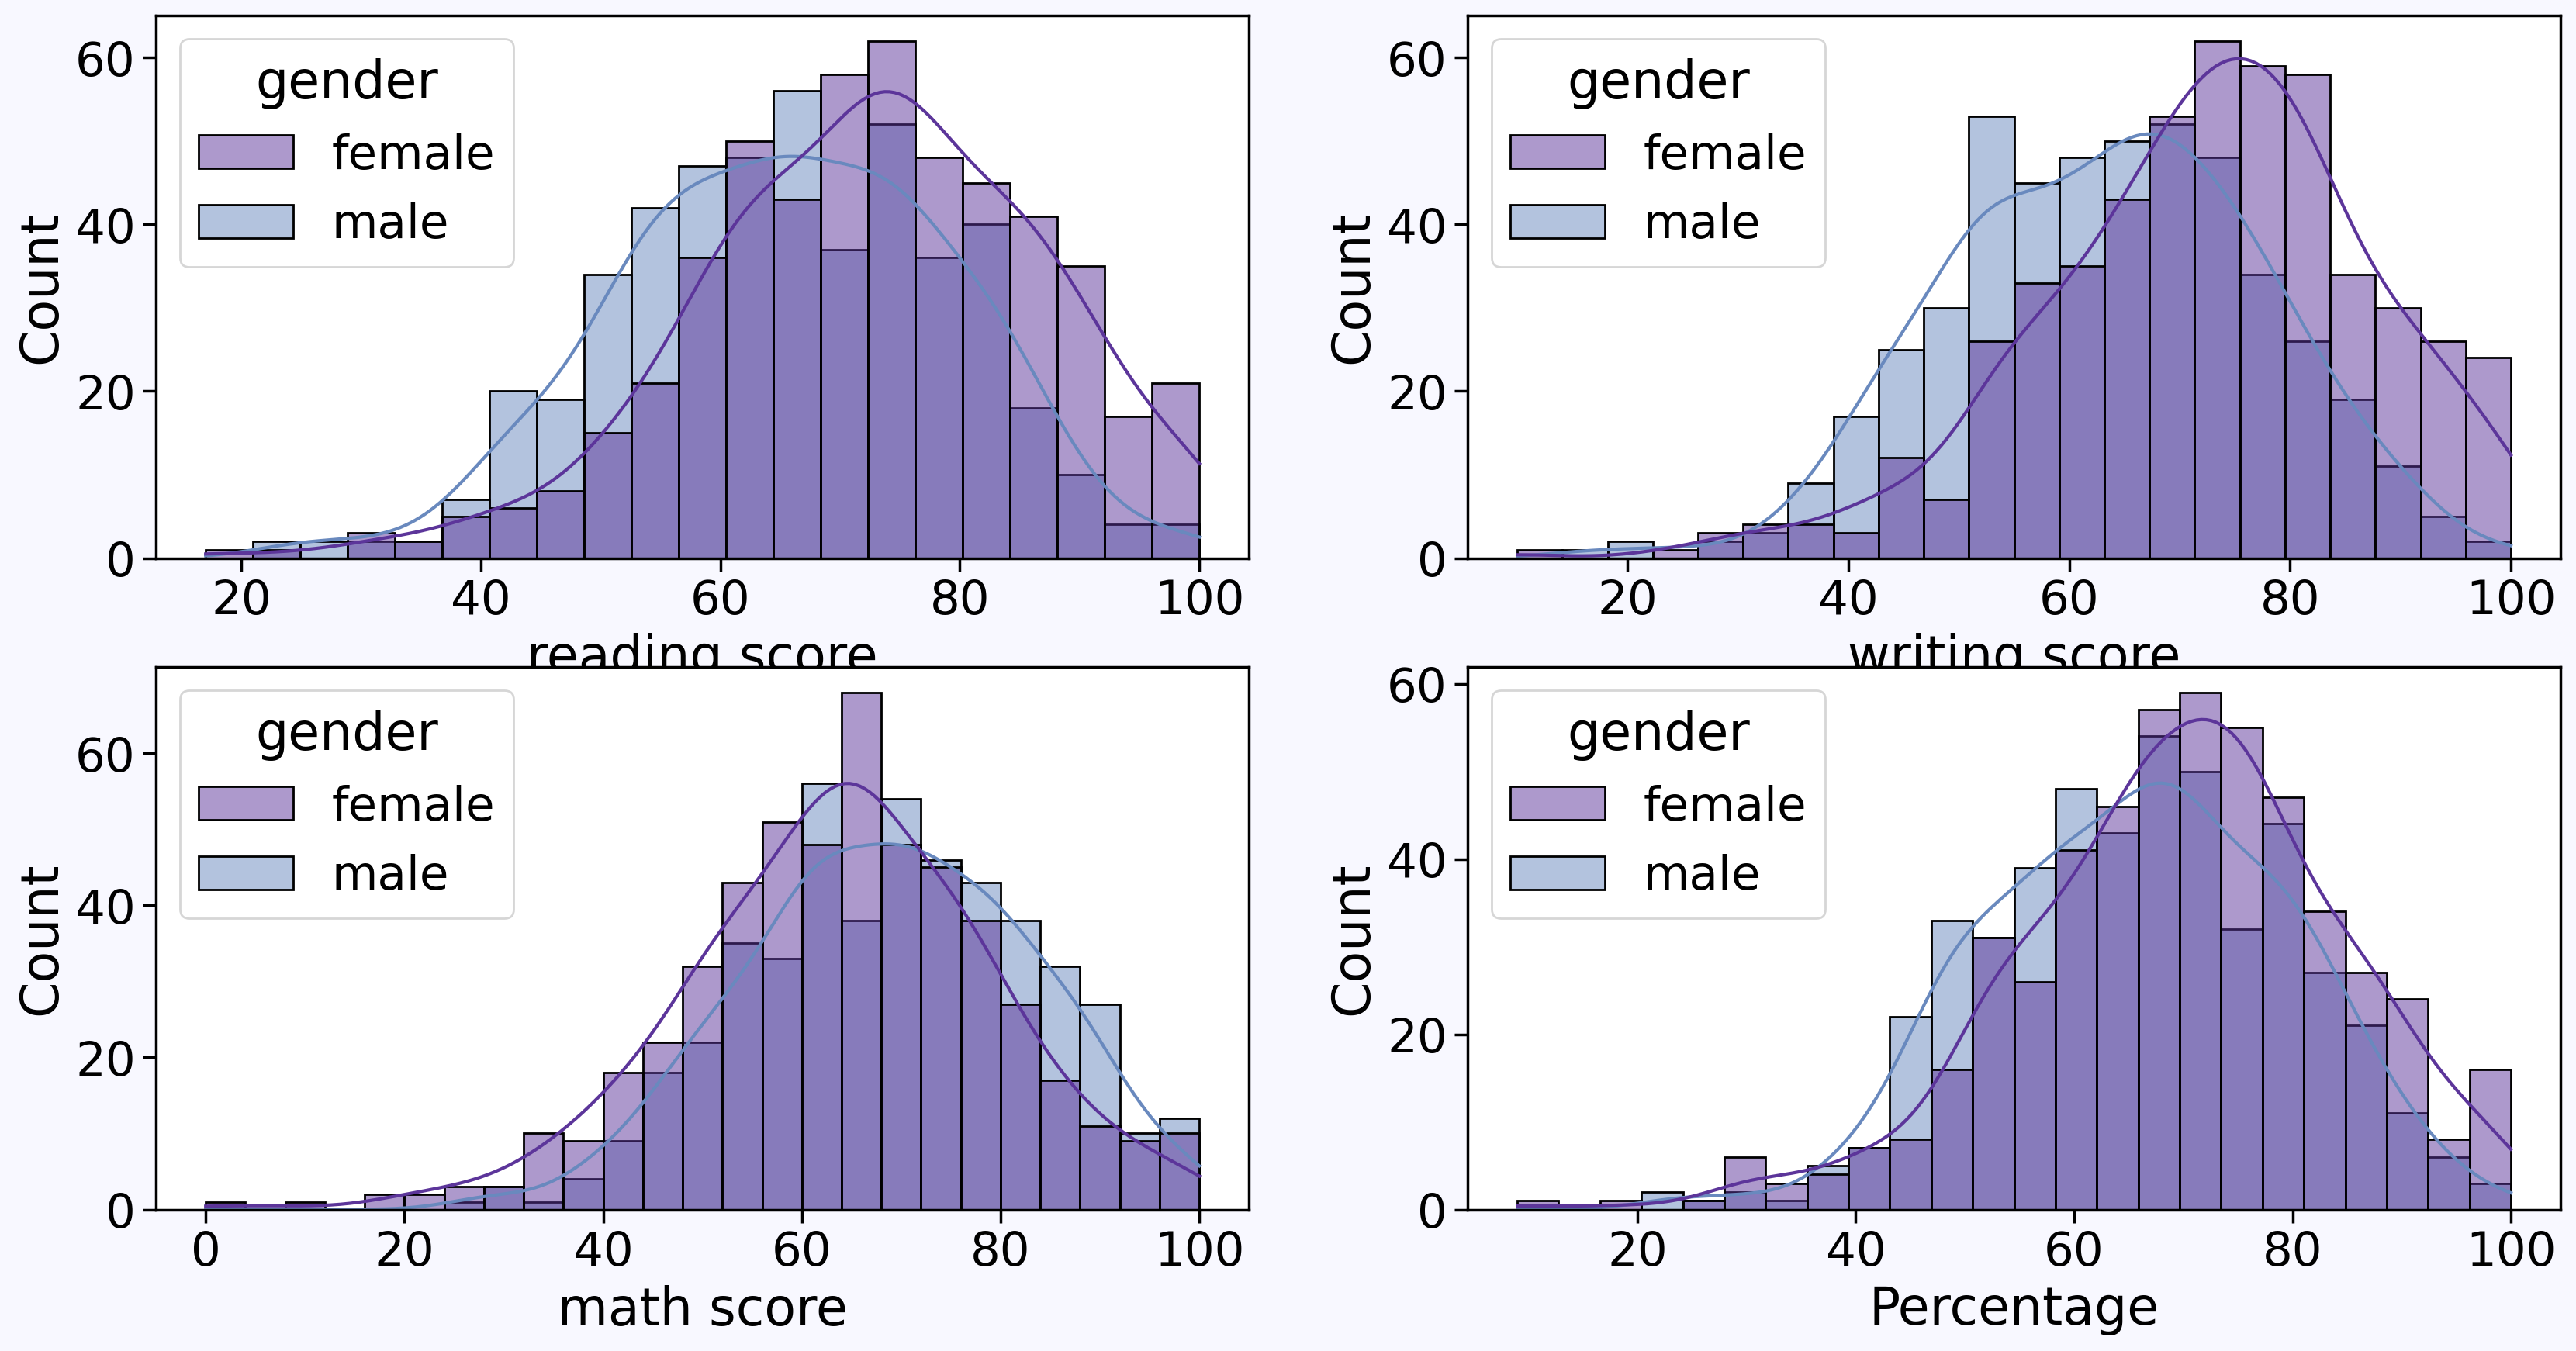

In [18]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10),dpi = 200)#dpi = 120
sns.histplot(x = 'reading score' ,data =data ,ax = axs[0][0] ,hue ='gender' ,kde = True)
sns.histplot(x = 'writing score' ,data =data ,ax = axs[0][1],hue ='gender',kde = True)
sns.histplot(x = 'math score' ,data =data ,ax = axs[1][0],hue ='gender',kde = True)
sns.histplot(x = 'Percentage' ,data =data ,ax = axs[1][1],hue ='gender',kde = True)

Almost all the scores are in normal distribution for both genders

Text(0.5, 1.08, 'Pair plot for Gender')

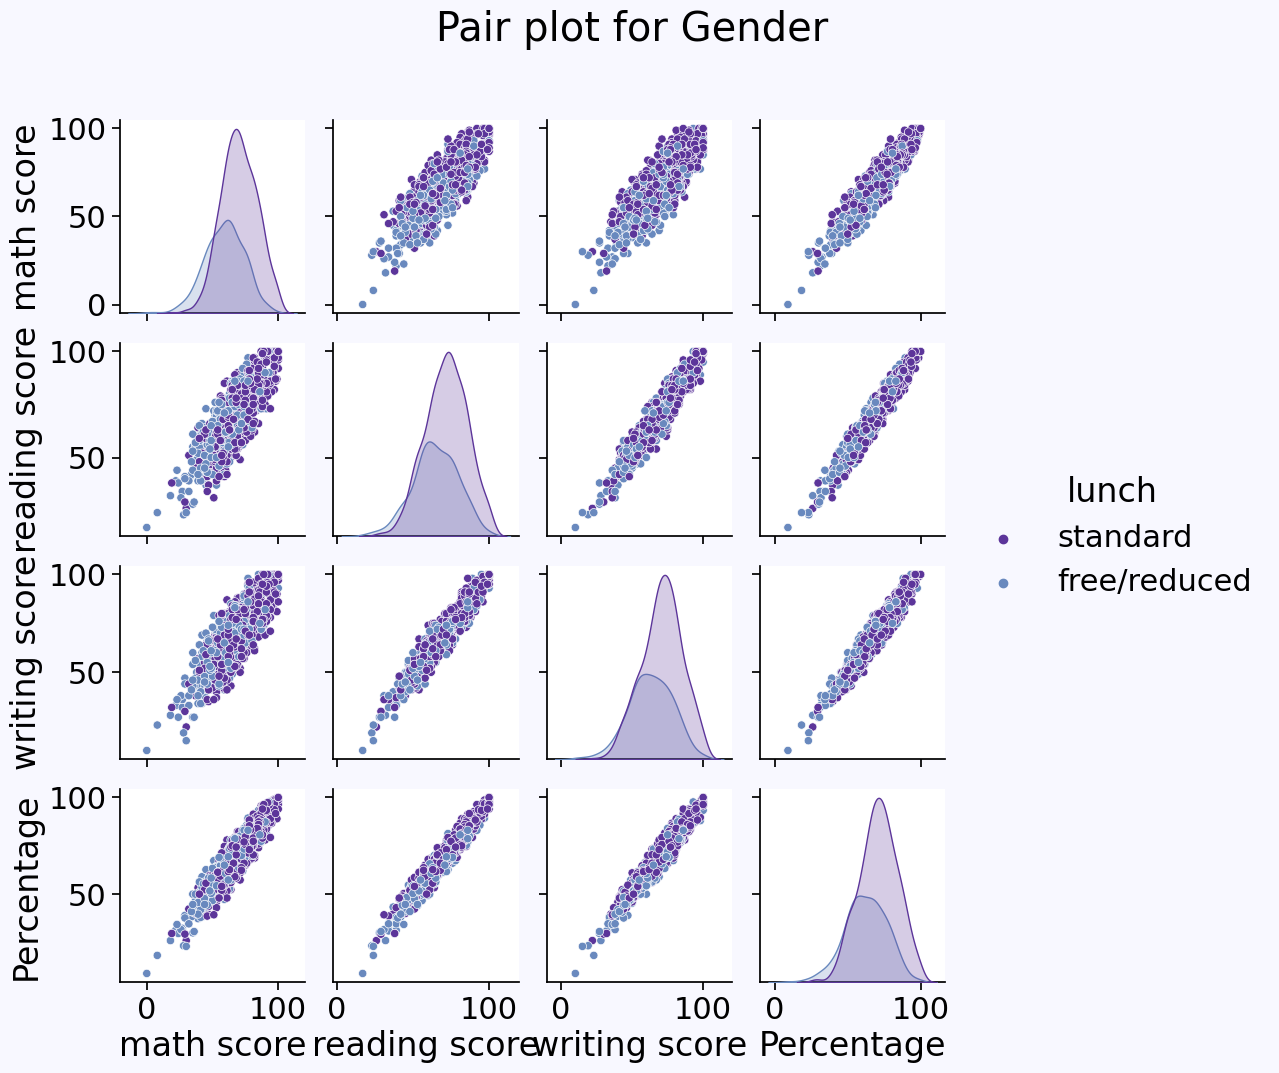

In [19]:
g  = sns.pairplot(data = data, hue="lunch")
g.fig.suptitle("Pair plot for Gender", y=1.08)

- The pair plot all scores for each other. 
- It states that all the scores are correlated positively as we can see the contour along the ‘x=y’ line.


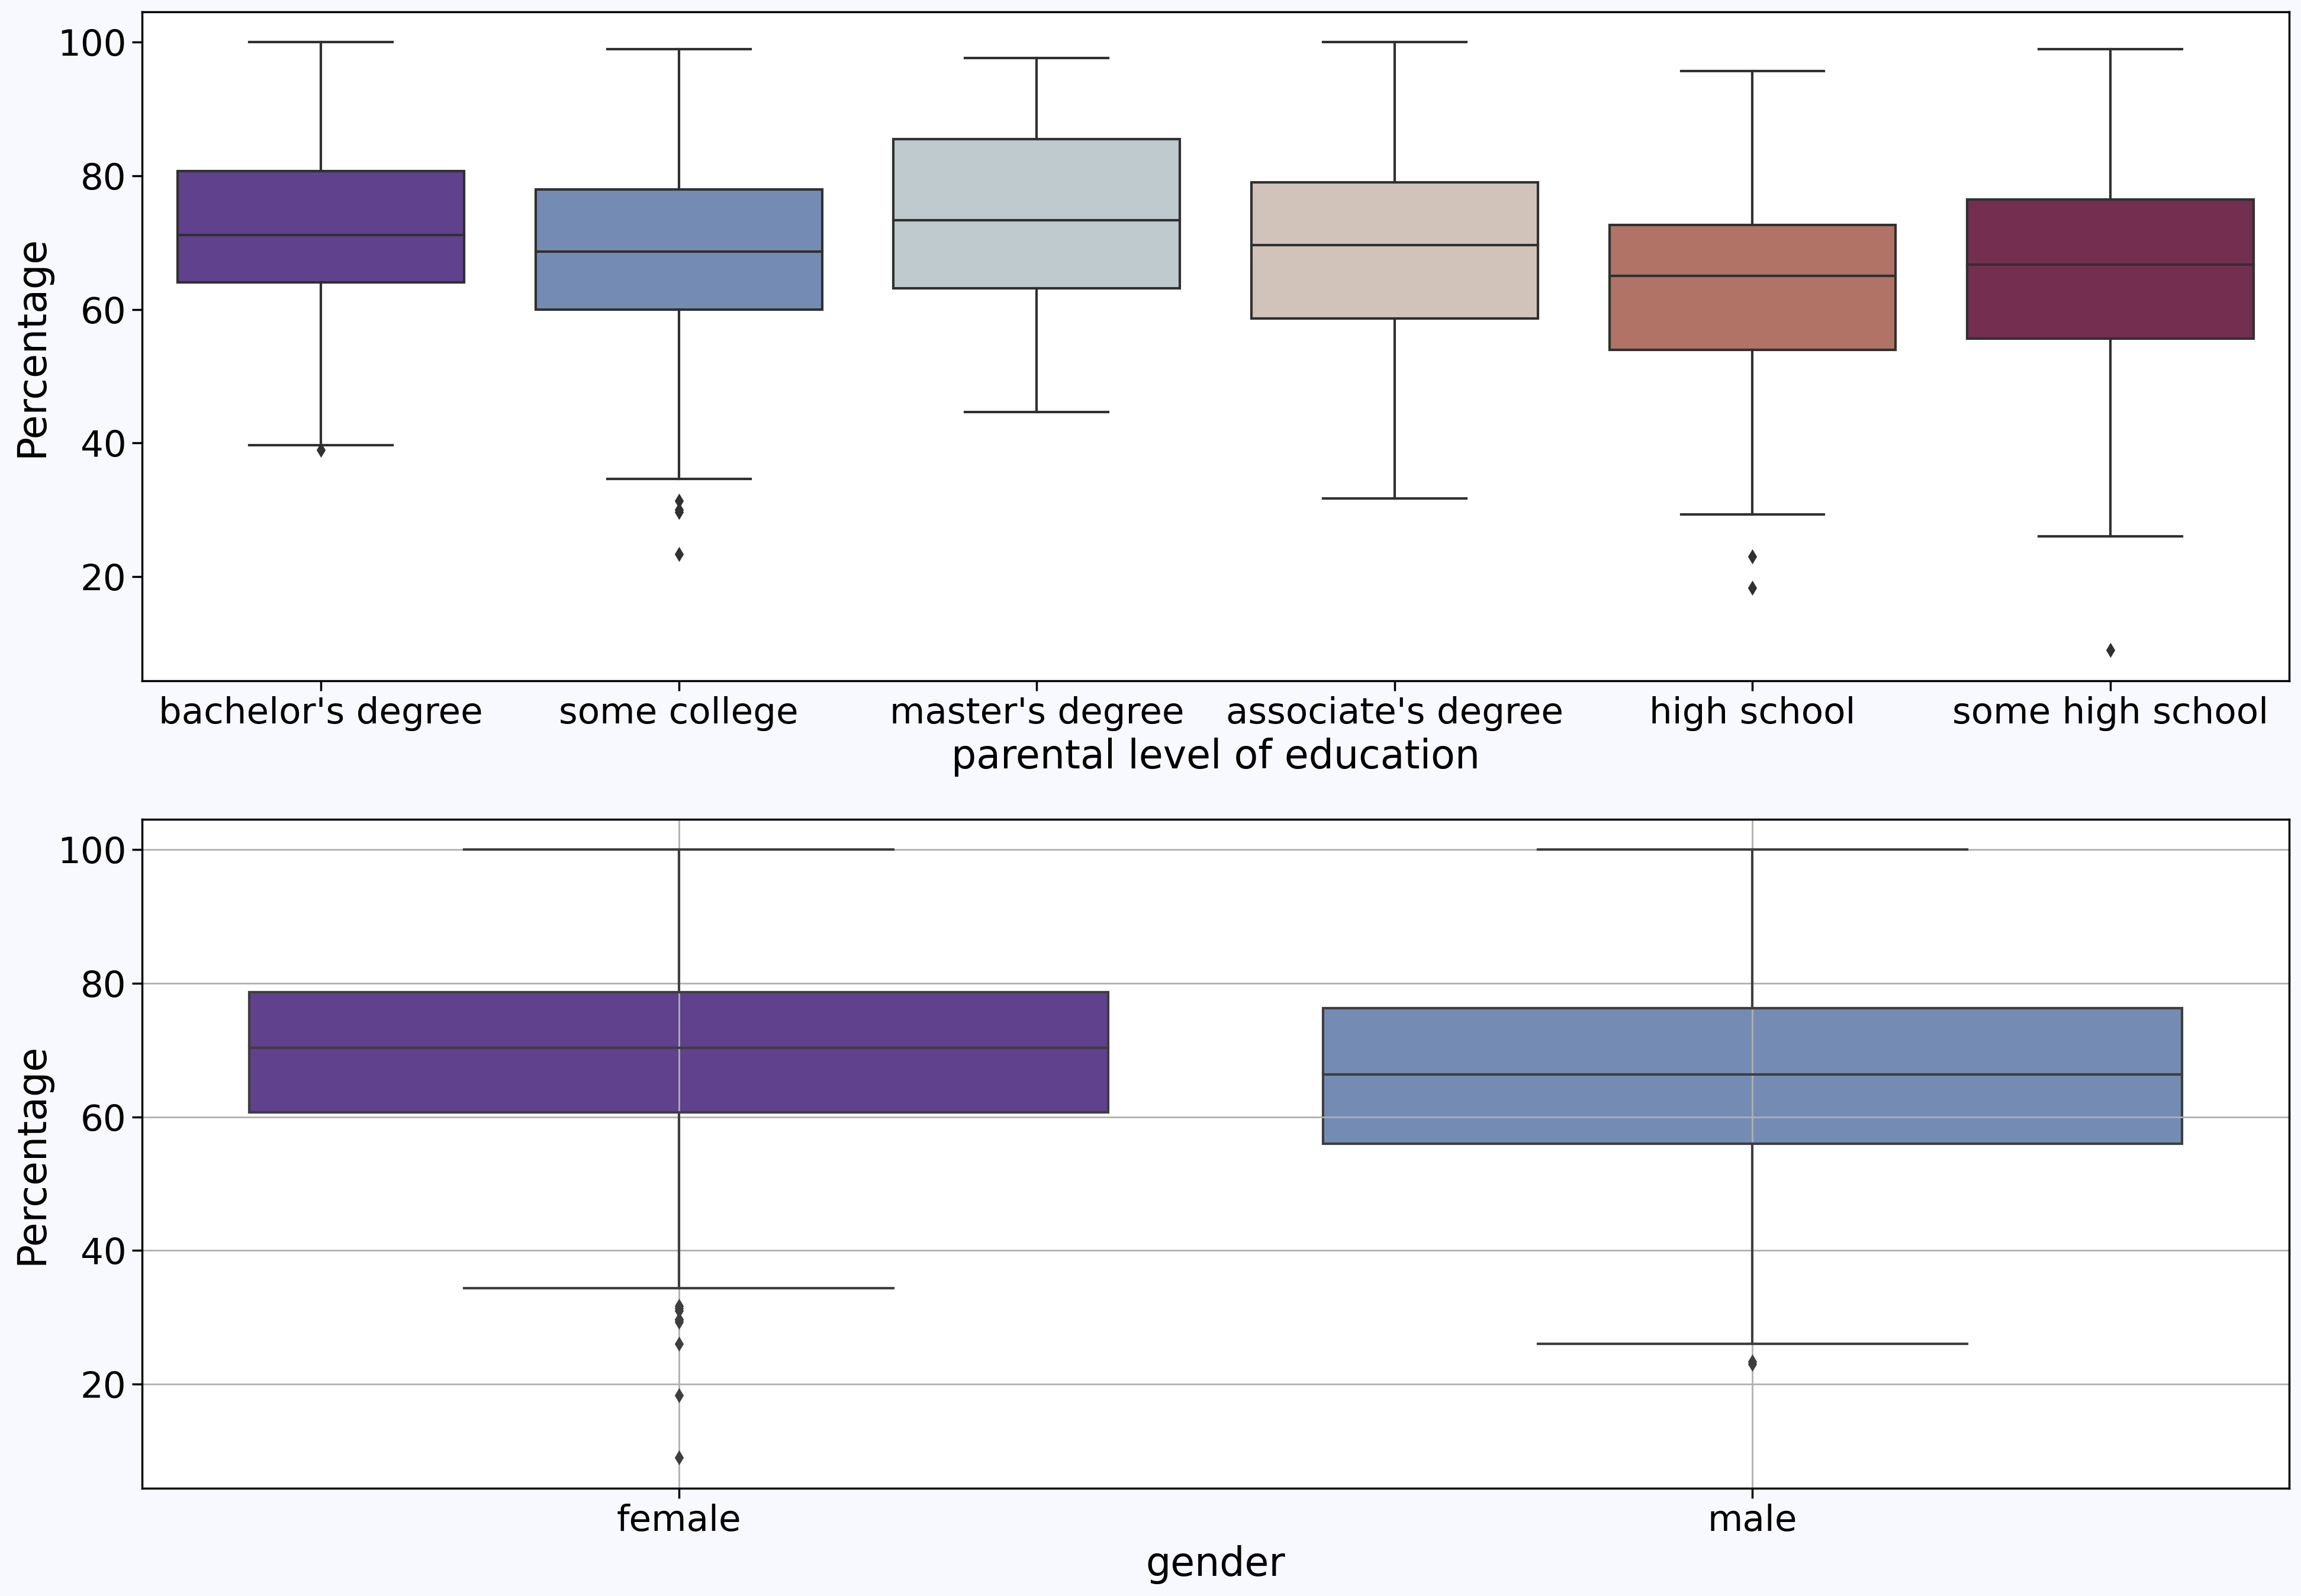

In [20]:
fig, axs = plt.subplots(2, 1, figsize = (20, 14),dpi = 200)#dpi = 120

sns.boxplot(data = data , y = 'Percentage',x = 'parental level of education' , ax = axs[0])
sns.boxplot(data = data , x = 'gender',y = 'Percentage' , ax = axs[1])
plt.grid()
plt.tight_layout()
plt.show()

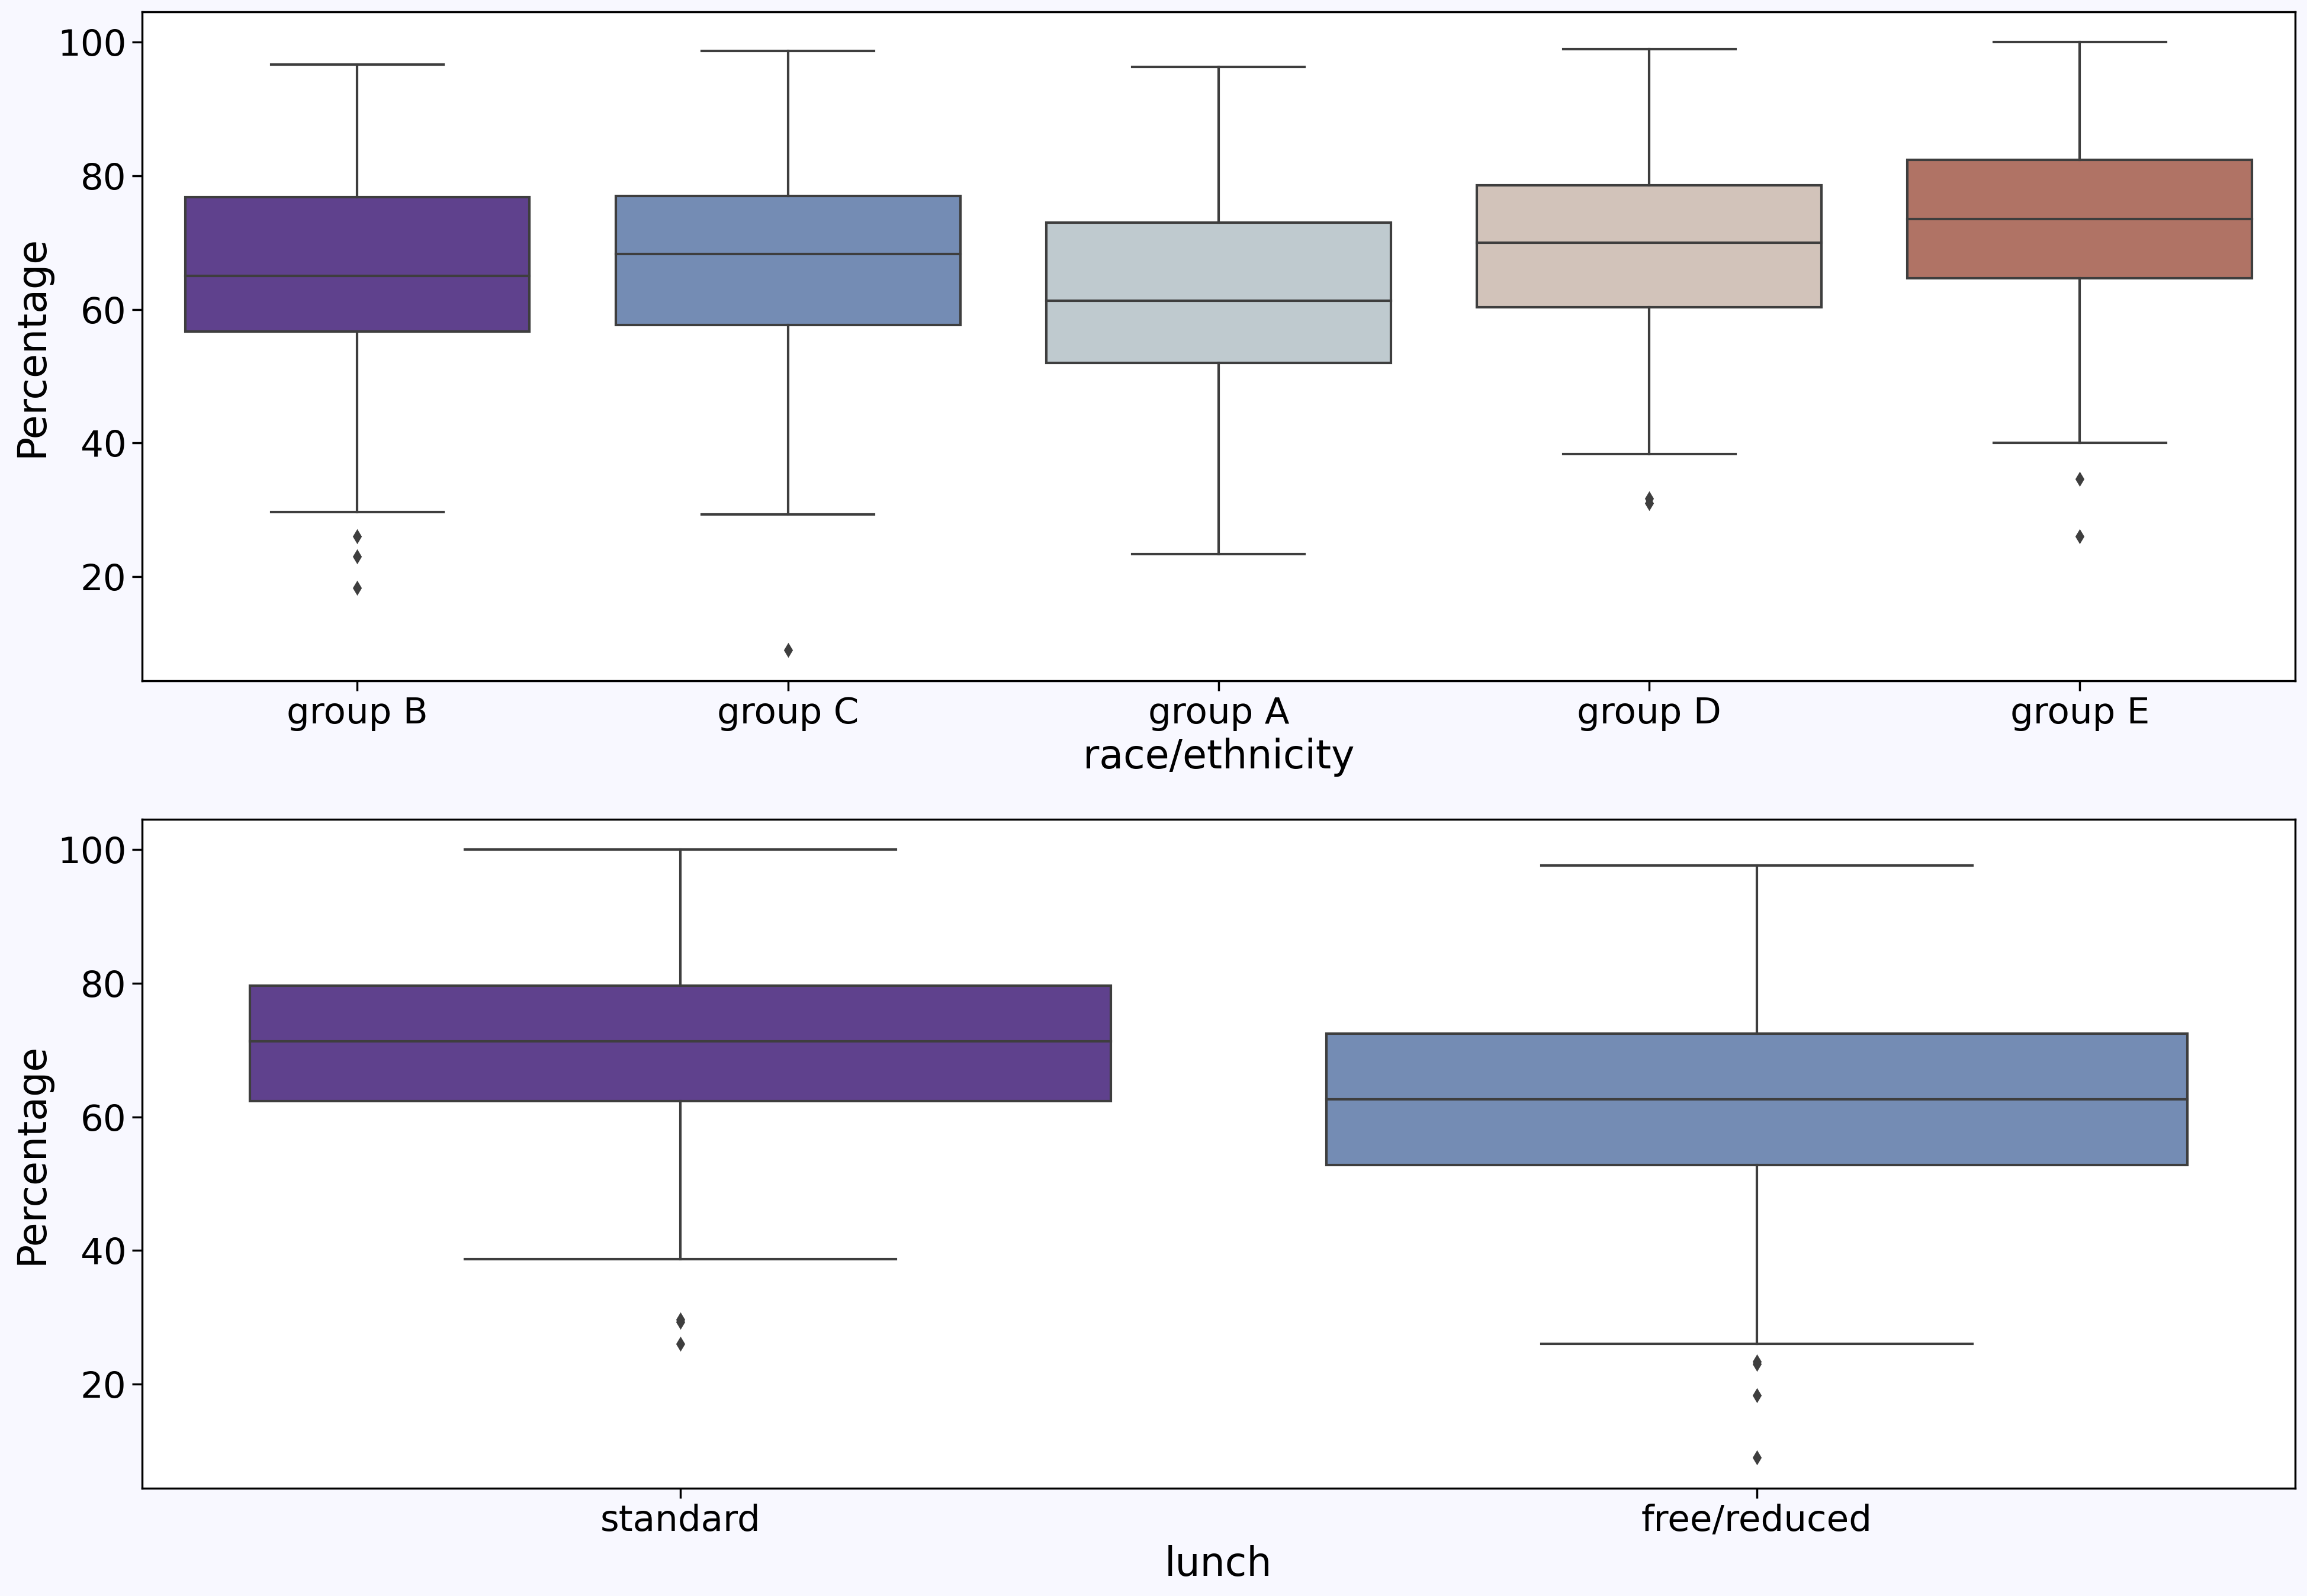

In [21]:
fig, axs = plt.subplots(2, 1, figsize = (20, 14),dpi = 200)#dpi = 120

sns.boxplot(data = data , x = 'race/ethnicity',y = 'Percentage' , ax = axs[0])
sns.boxplot(data = data , x = 'lunch',y = 'Percentage' , ax = axs[1])
plt.tight_layout()
plt.show()

- These are the box plot for parents level of education, gender, race/ethnicity and lunch attributes
- There are very few outliers in the dataset which are not really necessary to remove.


# Model

In [22]:
data.columns = data.columns.str.replace(" ", "_").copy()
data = data.rename({'parental_level_of_education':'parent_education', 
                        'race/ethnicity':'ethnicity', 
                        'test_preparation_course':'prep_course'}, 
                        axis=1).copy()
data.columns

Index(['gender', 'ethnicity', 'parent_education', 'lunch', 'prep_course',
       'math_score', 'reading_score', 'writing_score', 'Percentage'],
      dtype='object')

In [23]:
for column in data.columns[:5]:
    unique_values = data[column].unique()
    print(f'{column} unique values: {unique_values}', '\n')

gender unique values: ['female' 'male'] 

ethnicity unique values: ['group B' 'group C' 'group A' 'group D' 'group E'] 

parent_education unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch unique values: ['standard' 'free/reduced'] 

prep_course unique values: ['none' 'completed'] 



In [24]:
type(data['gender'][0])

str

In [25]:
data['gender'] = data['gender'].astype('category')
data['ethnicity'] = data['ethnicity'].astype('category')
data['lunch'] = data['lunch'].astype('category')
data['parent_education'] = data['parent_education'].astype('category')
data['prep_course'] = data['prep_course'].astype('category')
data.dtypes

gender              category
ethnicity           category
parent_education    category
lunch               category
prep_course         category
math_score             int64
reading_score          int64
writing_score          int64
Percentage           float64
dtype: object

In [26]:
def letter_grade(percentage):
    if percentage >= 90:
        return 'A'
    elif percentage < 90 and percentage >= 80:
        return 'B'
    elif percentage < 80 and percentage >= 70:
        return 'C'
    elif percentage < 70 and percentage >= 60:
        return 'D'
    else:
        return 'F'

In [27]:
data['grades'] = data.apply(lambda x: letter_grade(x['Percentage']), axis = 1 )

In [28]:
data['grades'].value_counts()

F    285
C    261
D    256
B    146
A     52
Name: grades, dtype: int64

In [29]:
class_df = pd.get_dummies(data=data, columns=['gender', 'ethnicity', 'parent_education', 'lunch',
                                                   'prep_course'], drop_first=True)

In [30]:
encoded_values = {'A':1, 'B':2, 'C':3, 'D':4, 'F':5}
class_df['grades'].replace(encoded_values, inplace=True)

In [31]:
class_df.drop(['Percentage'], axis = 1, inplace=True)

In [32]:
class_df.head()

,math_score,reading_score,writing_score,grades,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,prep_course_none
0,72,72,74,3,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,2,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,1,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,5,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,3,1,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
%pip install yellowbrick
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/226.0 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 163.8/226.0 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from yellowbrick.classifier import ROCAUC
# from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
# from yellowbrick.style import set_palette

from sklearn.metrics import balanced_accuracy_score, accuracy_score,confusion_matrix
from imblearn.metrics import sensitivity_score, specificity_score

In [34]:
class Student_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def transform(self, X):
        X = X
        X = X.drop(['grades'], axis = 1)
        return X 
    def fit(self, X, y):
        return self 
    
clfs = [RandomForestClassifier(n_estimators=50, random_state=42),
        DecisionTreeClassifier(random_state=42),
        KNeighborsClassifier(n_neighbors=5),
        LogisticRegression(max_iter=80, random_state=42)]

X_train, X_test, y_train, y_test = train_test_split(class_df, class_df.grades.ravel(), test_size=0.20, random_state=42)

In [35]:
def model():
    fig = plt.figure(figsize=(20,20))
    k = 1
    for x in clfs:
        pipe = Pipeline([
            ('student', Student_Transformer()),
            ('std', StandardScaler(),),
            ('class', x)
        ])
        
        pipe.fit(X_train, y_train)
        classifier = pipe['class'].__class__.__name__
        print("-"*40,classifier,"-"*40, end="\n\n")
        y_pred = pipe.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        print(f"The confusion matrix for {classifier}:")
        print(cm)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        sen = sensitivity_score(y_test, y_pred, average='weighted')
        spec = specificity_score(y_test, y_pred, average='weighted')
        print(f"The accuracy score for {classifier} is {round((acc*100),2)}%")
        print(f"The balanced accuracy score for {classifier} is {round((bal_acc*100),2)}%")
        print(f"The sensitivity for {classifier} is {round((sen*100),2)}%")
        print(f"The specificity for {classifier} is {round((spec*100),2)}%")
        with plt.style.context("ggplot"):
            plt.subplot(2,2,k)
            roc = ROCAUC(pipe)
            roc.fit(X_train, y_train)
            roc.score(X_test, y_test)
            k += 1
            roc.finalize()
            plt.grid(True)
    plt.show()

---------------------------------------- RandomForestClassifier ----------------------------------------

The confusion matrix for RandomForestClassifier:
[[ 2  2  0  0  0]
 [ 1 23  3  0  0]
 [ 0  1 55  3  0]
 [ 0  0  5 40  3]
 [ 0  0  0  2 60]]
The accuracy score for RandomForestClassifier is 90.0%
The balanced accuracy score for RandomForestClassifier is 81.7%
The sensitivity for RandomForestClassifier is 90.0%
The specificity for RandomForestClassifier is 96.62%
---------------------------------------- DecisionTreeClassifier ----------------------------------------

The confusion matrix for DecisionTreeClassifier:
[[ 3  1  0  0  0]
 [ 2 21  4  0  0]
 [ 0  2 55  2  0]
 [ 0  0  5 39  4]
 [ 0  0  0  4 58]]
The accuracy score for DecisionTreeClassifier is 88.0%
The balanced accuracy score for DecisionTreeClassifier is 84.16%
The sensitivity for DecisionTreeClassifier is 88.0%
The specificity for DecisionTreeClassifier is 96.02%
---------------------------------------- KNeighborsClassifi

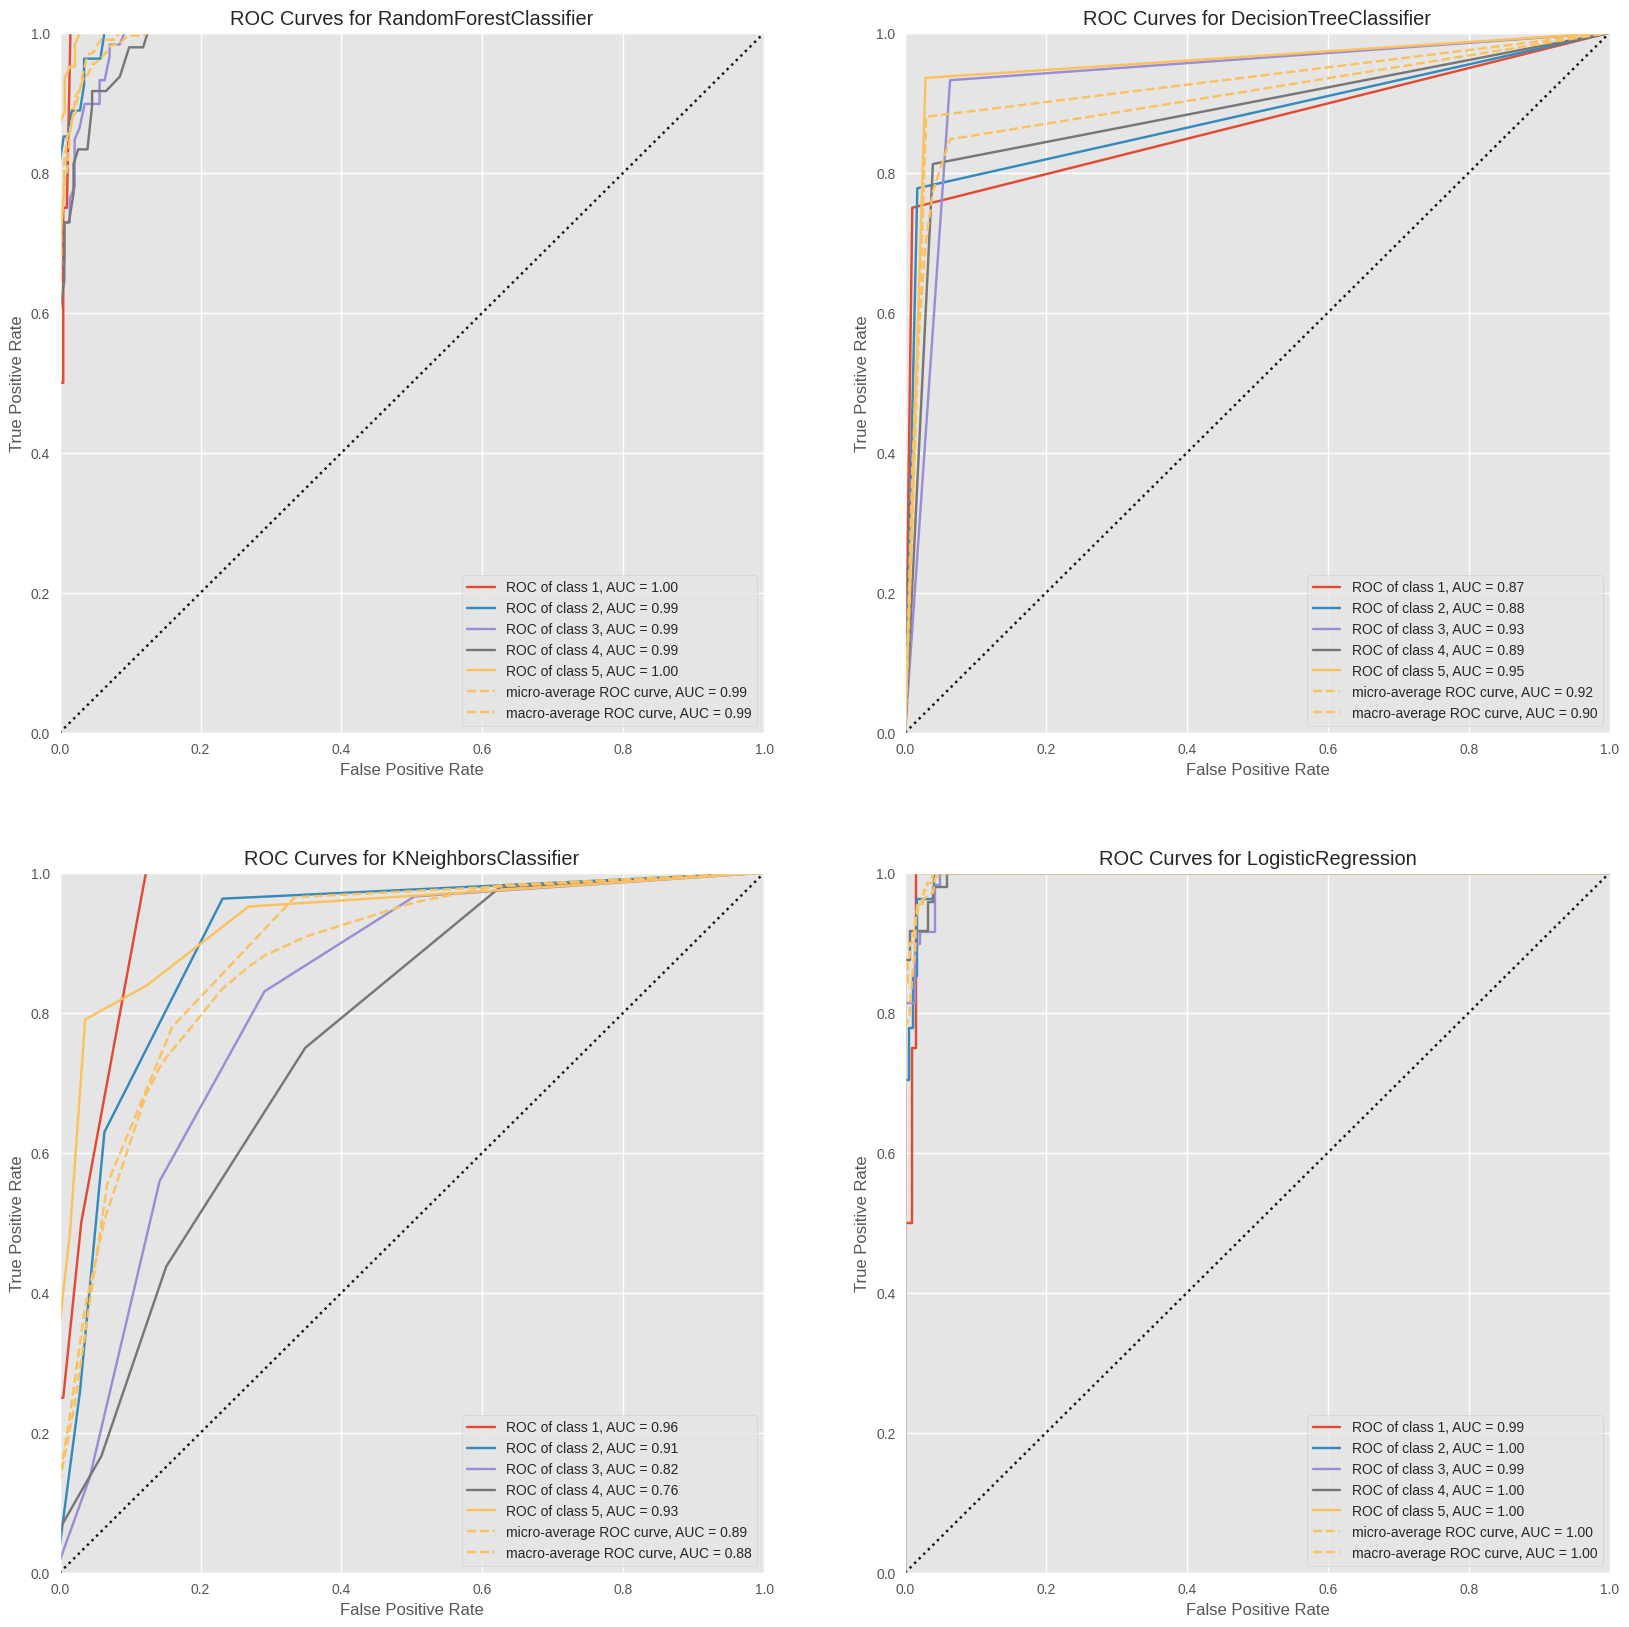

In [36]:
model()